In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

gain1 = 6.93e-7

alpha1 = 1.7

Vth1 = 0.95

gain2 = 4.55*6.93e-7

alpha2 = 3.4

Vth2 = 1.2

Vds = 6

In [2]:
def I_at(Vgs,Vth,Vds,alpha,gain):
    Vgt = 0.5*(Vgs - Vth + np.sqrt((Vgs-Vth)**2+1e-30)) 
    Vdsat = (Vgt)/alpha
    Vdseff = Vds - 0.5*(Vds - Vdsat + np.sqrt((Vds - Vdsat)**2 + 1e-30))
    Iat = gain*alpha*(Vdsat*Vdseff - 0.5*Vdseff**2)
    return Iat

In [3]:
def I_st(Vgs,Vth,m,Io,Is):
    Iss = Io*np.exp((Vgs-Vth)/(m*0.026))
    Ist = (1/Iss + 1/Is)**(-1)
    return Ist

In [66]:
Vth = 1.2
Vds = 6
alpha = 3.4
gain = 4.55*6.93e-7
Io = I_at(Vth+3*0.026,Vth,Vds,alpha,gain)
Is = I_at(Vth+4*0.026,Vth,Vds,alpha,gain)
m = 3

Vgs_arr = np.arange(0,12,0.001)
Iat_arr = I_at(Vgs_arr,Vth,Vds,alpha,gain)
Ist_arr = I_st(Vgs_arr,Vth,m,Io,Is)
Ids_arr = Iat_arr+Ist_arr

Ids_grad_arr = np.gradient(Ids_arr,Vgs_arr)

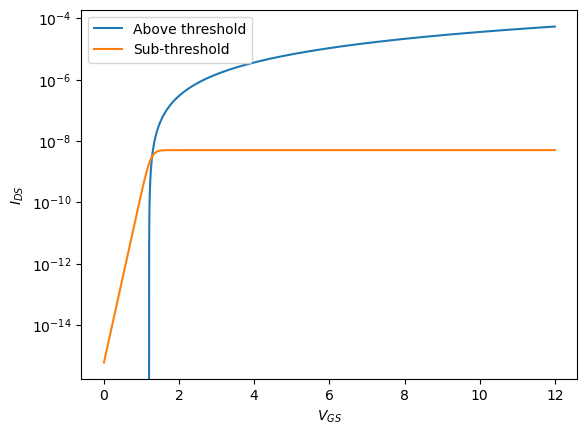

In [67]:
#%matplotlib ipympl
plt.figure()
plt.plot(Vgs_arr,Iat_arr,label='Above threshold')
plt.plot(Vgs_arr,Ist_arr,label='Sub-threshold')
#plt.plot(Vgs_arr,Ids_arr,label='Total-current')
#plt.xlim(1,1.4)
plt.ylabel('$I_{DS}$')
plt.xlabel('$V_{GS}$')
plt.yscale('log')
plt.legend()
plt.show()
#plt.close()


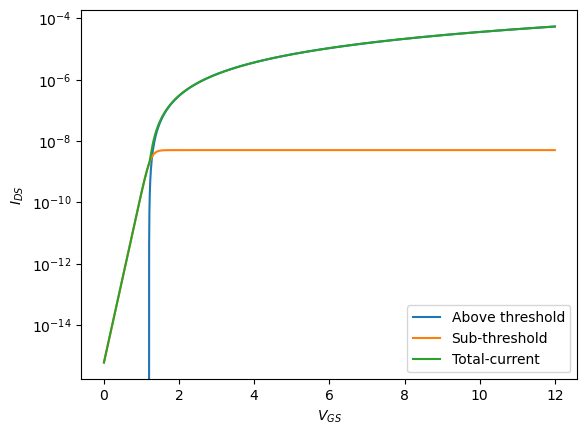

In [68]:
#%matplotlib ipympl
plt.figure()
plt.plot(Vgs_arr,Iat_arr,label='Above threshold')
plt.plot(Vgs_arr,Ist_arr,label='Sub-threshold')
plt.plot(Vgs_arr,Ids_arr,label='Total-current')
#plt.xlim(1,1.4)
plt.ylabel('$I_{DS}$')
plt.xlabel('$V_{GS}$')
plt.yscale('log')
plt.legend()
plt.show()
#plt.close()

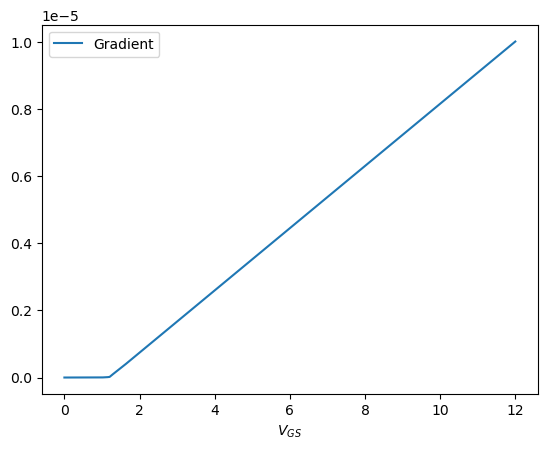

In [69]:
#%matplotlib ipympl
plt.plot(Vgs_arr,Ids_grad_arr,'-',label='Gradient')
#plt.xlim(0.5,1.5)
#plt.ylabel('$\frac{dI_{DS}}{dV_{GS}}$')
plt.xlabel('$V_{GS}$')
#plt.yscale('log')
plt.legend()
plt.show()

In [9]:
idvg_10 = pd.read_csv('ids-vgs-10.csv')

In [21]:
vg = np.array(idvg_10['x'])
id = np.array(idvg_10[' y'])

In [48]:
id_linear = np.array([3.94210509e-11, 5.22557224e-11, 6.98348549e-11, 9.61120828e-11,
       1.30309506e-10, 1.79341936e-10, 2.48804568e-10, 3.37861118e-10,
       4.74644809e-10, 6.73980874e-10, 9.59904302e-10, 1.32524812e-09,
       1.81533881e-09, 2.51306965e-09, 3.45325403e-09, 4.73097877e-09,
       6.39419099e-09, 8.77259039e-09, 1.17220685e-08, 1.64419386e-08])
vg_linear = vg[:id_linear.size]

In [49]:
vg_linear

array([-0.01101936,  0.03870001,  0.07960389,  0.11803943,  0.16925744,
        0.20734037,  0.25106521,  0.28897182,  0.34565543,  0.39484588,
        0.43830625,  0.49005319,  0.54470924,  0.60024683,  0.65499104,
        0.71449561,  0.7743528 ,  0.82953777,  0.88419382,  0.94219976])

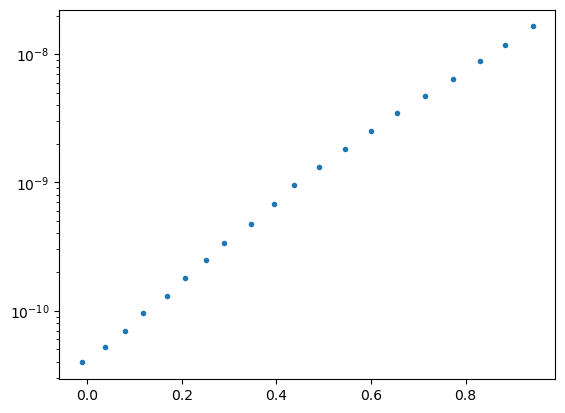

In [50]:
plt.plot(vg_linear,id_linear,'.')
plt.yscale('log')

In [59]:
id_linear_log = np.log(id_linear)

In [60]:
id_linear_log

array([-23.95672116, -23.67487171, -23.38488788, -23.06550608,
       -22.76110868, -22.44172688, -22.1143534 , -21.8083862 ,
       -21.46845436, -21.11781938, -20.76418752, -20.44166613,
       -20.12699371, -19.80176086, -19.48394885, -19.16913373,
       -18.86787592, -18.5516337 , -18.26179258, -17.92343053])

In [61]:
1/(np.mean(np.gradient(id_linear_log,vg_linear)[1:-1])*0.026)

5.858101559551734